In [194]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

from tensorflow import keras

import utils

plt.rcParams['figure.figsize'] = (25, 8)
plt.rcParams["figure.autolayout"] = True

In [195]:
df_genre = pd.read_csv("all_genre.csv")

In [196]:
df_genre.head()

,id,preview_url,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,duration_ms,file_name
0,1EzrEOXmMH3G43AXT1y7pA,https://p.scdn.co/mp3-preview/28154061cbfda9d5...,acoustic,0.703,0.444,11,-9.331,1,0.0417,0.55900,0.000000,0.0973,0.712,150.960,https://api.spotify.com/v1/audio-analysis/1Ezr...,242947,acoustic_1.wav
1,4E6cwWJWZw2zWf7VFbH7wf,https://p.scdn.co/mp3-preview/7ed132f9327678a8...,acoustic,0.583,0.786,2,-3.142,0,0.0301,0.02080,0.000000,0.1880,0.573,123.055,https://api.spotify.com/v1/audio-analysis/4E6c...,258827,acoustic_2.wav
2,53QF56cjZA9RTuuMZDrSA6,https://p.scdn.co/mp3-preview/bf486b927761bf99...,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.69400,0.000000,0.1150,0.139,133.406,https://api.spotify.com/v1/audio-analysis/53QF...,240166,acoustic_3.wav
3,0IktbUcnAGrvD03AWnz3Q8,https://p.scdn.co/mp3-preview/a89bf59628fb81ad...,acoustic,0.625,0.414,0,-8.700,1,0.0369,0.29400,0.000000,0.1510,0.669,130.088,https://api.spotify.com/v1/audio-analysis/0Ikt...,189613,acoustic_4.wav
4,6Uy6K3KdmUdAfelUp0SeXn,https://p.scdn.co/mp3-preview/43d2cef16aa11c7d...,acoustic,0.551,0.836,10,-3.838,0,0.0524,0.00502,0.000021,0.0425,0.758,185.063,https://api.spotify.com/v1/audio-analysis/6Uy6...,220573,acoustic_5.wav


In [197]:
parent_dir = "E:/genre_classification_data/music_data/"

In [198]:
filename = os.path.join(parent_dir + "anime/anime_1.wav")


x, sr = librosa.load(filename, sr=None, mono=True,offset=0.0, duration=5.0)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 0, 5
ipd.Audio(data=x[start*sr:end*sr], rate=sr)
x.shape

Duration: 5.00s, 220500 samples


(220500,)

## wave radio

(44100,)

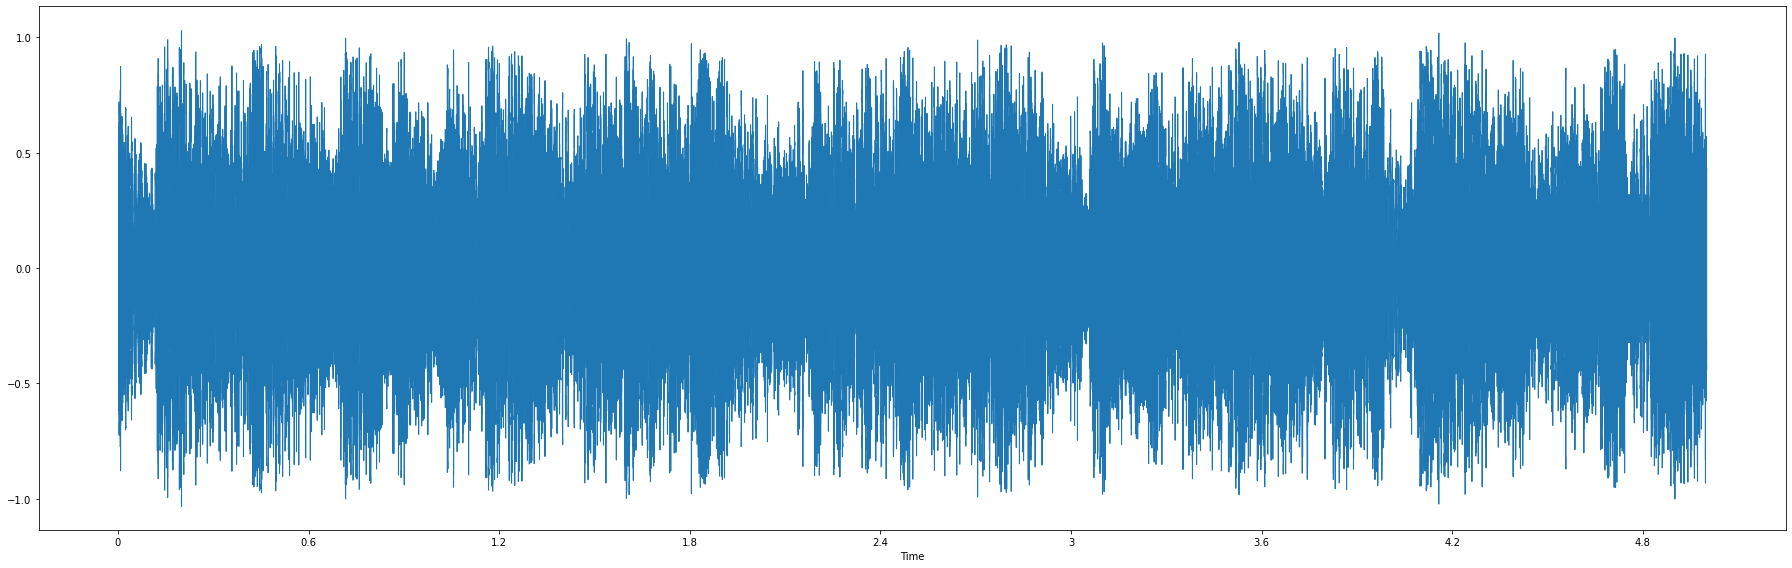

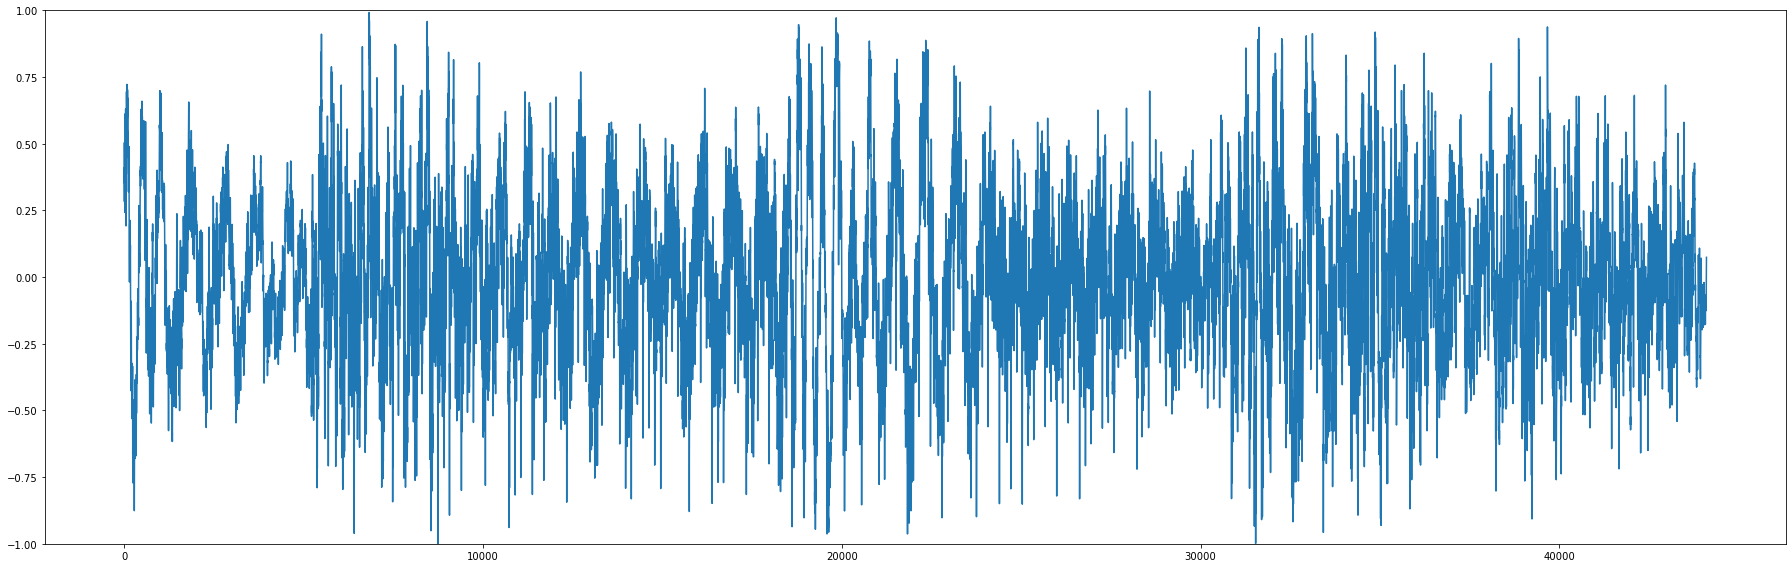

In [199]:
librosa.display.waveshow(x,sr=sr);
# plt.vlines([start, end], -1, 1)

plt.figure()
plt.plot(x[start:start+sr])
plt.ylim((-1, 1));
x[start:start+sr].shape

In [200]:
x

array([ 0.28555292,  0.3995791 ,  0.40967238, ...,  0.12612855,
        0.14272976, -0.01265501], dtype=float32)

## chroma feature

(12, 431)

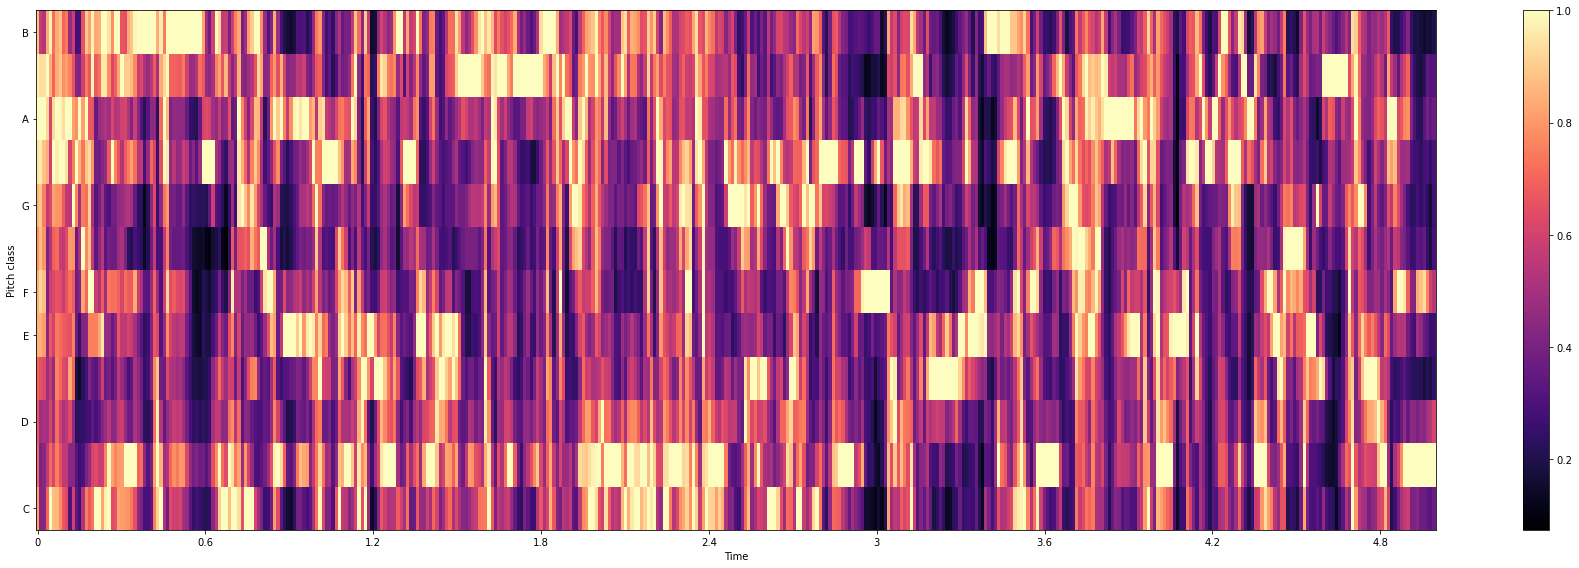

In [201]:
chroma = librosa.feature.chroma_stft(y=x,sr=sr)

fig, ax = plt.subplots()
img = librosa.display.specshow(chroma,sr=sr, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img)
chroma.shape

(12, 87)

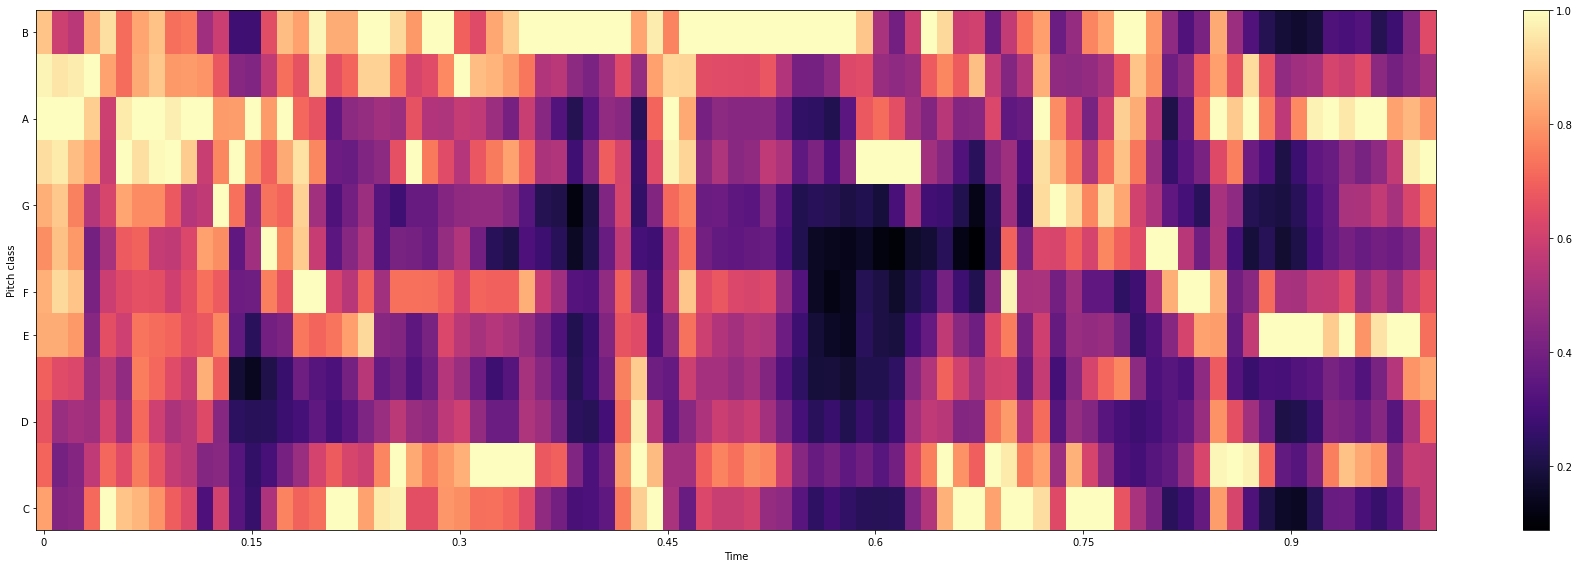

In [202]:
chroma = librosa.feature.chroma_stft(y=x[start:start+sr],sr=sr)

fig, ax = plt.subplots()
img = librosa.display.specshow(chroma,sr=sr, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img)
chroma.shape

## group genre

หาข้อมูลสำหรับการรวมกลุ่มเพลงโดยอ้างอิงจาก 3 แหล่งข้อมูลนี้
- https://www.chosic.com/list-of-music-genres/
- https://www.gemtracks.com/guides/view.php?title=complete-list-of-music-genres&id=298
- https://chat.openai.com/

In [301]:
f = open("group-genre.txt","r")
text = f.read()
f.close()

genre_group = {}
class_name = []
group_genre = {main_genre : [genre.strip() for genre in sub_genre.split(",")] for main_genre,sub_genre in [i.split(":") for i in text.split("\n")]}

for main_genre,sub_genre in [i.split(":") for i in text.split("\n")]:
    sub_genre = [genre.strip() for genre in sub_genre.split(",")]
    main_genre = main_genre.lower()
    for genre in sub_genre:
        genre_group[genre] = main_genre
        if main_genre not in class_name:
            class_name.append(main_genre)

In [302]:
map_class = {main_genre : num for num,main_genre in zip(range(len(class_name)),class_name)}

In [303]:
df_genre['main_genre'] = [map_class.get(genre_group.get(genre)) for genre in df_genre.genre]

In [304]:
df_genre.loc[df_genre.main_genre == 21].head()

,id,preview_url,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,duration_ms,file_name,main_genre
250,1q8NdCAQ9QUjpYiqzdd3mv,https://p.scdn.co/mp3-preview/6632fb09b449bde7...,afrobeat,0.829,0.878,9,-5.951,1,0.1010,0.0959,0.000,0.776,0.883,87.991,https://api.spotify.com/v1/audio-analysis/1q8N...,239307,afrobeat_1.wav,21
251,2Y3x5VcEAxLNmVHxQOE0jB,https://p.scdn.co/mp3-preview/ff0614b171f2ce8b...,afrobeat,0.778,0.399,1,-8.984,1,0.0858,0.0751,0.835,0.103,0.321,137.305,https://api.spotify.com/v1/audio-analysis/2Y3x...,67720,afrobeat_2.wav,21
252,6Dq2LzijkY9WNPwBGDah4L,https://p.scdn.co/mp3-preview/70858bcfe6c190b1...,afrobeat,0.463,0.382,5,-11.682,1,0.0278,0.8970,0.263,0.108,0.638,74.573,https://api.spotify.com/v1/audio-analysis/6Dq2...,209160,afrobeat_3.wav,21
253,4pR4oQJULf7FDB54TleMyH,https://p.scdn.co/mp3-preview/420a1e6f09ba7216...,afrobeat,0.443,0.778,0,-7.564,0,0.2660,0.2410,0.000,0.215,0.628,128.250,https://api.spotify.com/v1/audio-analysis/4pR4...,168000,afrobeat_4.wav,21
254,4bJ7tMJqfYmkKgCYzaaG4B,https://p.scdn.co/mp3-preview/9dc0e96d3662e681...,afrobeat,0.571,0.508,11,-8.118,0,0.0254,0.5320,0.951,0.161,0.102,96.825,https://api.spotify.com/v1/audio-analysis/4bJ7...,174827,afrobeat_5.wav,21


In [305]:
df_data = df_genre.drop(df_genre.loc[df_genre.main_genre == 21].index)

ลบหมดหมู่ที่ไม่สามารถใช้งานได้ เนื่องจากเหตุผลต่าง ๆ เช่น 
- มีหลากหลายหมวดในหมวดเดียวกัน : anime
- เป็นนามธรรมเกินไป : party

โดยได้ลบออกไป 24 หมวด เหลือ 89 หมวด แบ่งได้เป็น 21 class

In [306]:
len(df_genre.genre.unique()) - len(df_data.genre.unique()), len(df_data.genre.unique())

(24, 89)

In [307]:
class_name.remove("not_use")
map_class.pop('not_use')
class_len = len(class_name)

In [308]:
class_len

21

In [309]:
len(df_data),len(df_genre)

(22250, 28250)

In [310]:
map_class

{'acoustic': 0,
 'folk': 1,
 'alternative/indie': 2,
 'blues': 3,
 'jazz': 4,
 'classical': 5,
 'opera': 6,
 'club': 7,
 'instrumental': 8,
 'country': 9,
 'techno': 10,
 'electronic': 11,
 'house': 12,
 'hip-hop': 13,
 'rock': 14,
 'metal': 15,
 'pop': 16,
 'r&b/soul': 17,
 'reggae': 18,
 'latin': 19,
 'industrial': 20}

In [317]:
(df_data.groupby('main_genre').size()//250)

main_genre
0      3
1      3
2      8
3      1
4      1
5      3
6      1
7     10
8      5
9      3
10     3
11    10
12     4
13     1
14     8
15     6
16     8
17     3
18     3
19     4
20     1
dtype: int64

In [318]:
   print(list(map_class)[3])

blues


หาจำนวนเพลงที่น้อยที่สุดว่ามีเพลงอะไรบ้าง

In [311]:
for i in df_data.main_genre.unique()[(df_data.groupby('main_genre').size()//250) == 1]:
    print(list(map_class)[i])

instrumental
metal
blues
techno
reggae


In [312]:
from sklearn.model_selection import train_test_split

In [241]:
X = df_data.iloc[:,-2]
y = df_data.iloc[:,-1]

In [242]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [243]:
def print_class_count(y_train,y_val):
    classes_train, counts_train = np.unique(y_train, return_counts=True)
    classes_val, counts_val = np.unique(y_val, return_counts=True)
    
    print("""    train class: {}
   train count: {}
       val class: {}
      val count: {}
 """.format(classes_train,counts_train,classes_val,counts_val))

In [244]:
print_class_count(y_train,y_test)

    train class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
   train count: [ 600  600 1600  200  200  600  200 2000 1000  600  600 2000  800  200
 1600 1200 1600  600  600  800  200]
       val class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
      val count: [150 150 400  50  50 150  50 500 250 150 150 500 200  50 400 300 400 150
 150 200  50]
 


In [16]:
print(group_genre.get("acoustic"))

acoustic


In [17]:
len(class_name)

23

## other

In [ ]:
list_music_other = ['danceability', 'energy', 'key',
        'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness',
        'liveness', 'valence', 'tempo']

In [ ]:
df_genre.groupby("genre")[list_music_other].mean()

# model



In [38]:
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib


In [39]:
img_height = 12
img_width = 1080
batch_size = 64

In [40]:

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(directory="E:\genre_classification_data\chroma_data",
#                                                                 label_mode='categorical',
                                                                validation_split=0.2,
                                                                subset='both',
                                                                image_size=(img_height, img_width),
                                                                batch_size=batch_size,
                                                                seed=1234)

Found 750 files belonging to 3 classes.
Using 600 files for training.
Using 150 files for validation.


In [41]:
class_names = train_ds.class_names
class_names

['classical', 'pop', 'rock']

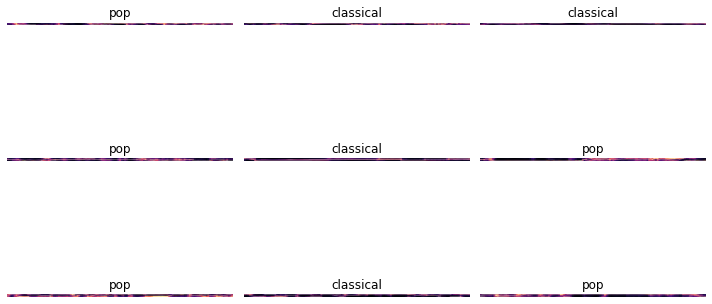

In [42]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [43]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [44]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, (12,8), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (12,8), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (6,1), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 12, 1080, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 12, 1080, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 540, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 540, 64)        196672    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 270, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 270, 128)       4

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
10/10 [==============================] - 7s 365ms/step - loss: 1.3353 - accuracy: 0.3533 - val_loss: 1.0735 - val_accuracy: 0.3200
Epoch 2/10
10/10 [==============================] - 1s 149ms/step - loss: 0.9319 - accuracy: 0.5117 - val_loss: 0.8087 - val_accuracy: 0.5800
Epoch 3/10
10/10 [==============================] - 1s 147ms/step - loss: 0.8022 - accuracy: 0.5800 - val_loss: 0.7000 - val_accuracy: 0.6400
Epoch 4/10
10/10 [==============================] - 1s 149ms/step - loss: 0.7266 - accuracy: 0.6250 - val_loss: 0.7470 - val_accuracy: 0.6067
Epoch 5/10
10/10 [==============================] - 1s 147ms/step - loss: 0.7277 - accuracy: 0.6333 - val_loss: 0.8355 - val_accuracy: 0.5400
Epoch 6/10
10/10 [==============================] - 1s 156ms/step - loss: 0.6748 - accuracy: 0.6667 - val_loss: 0.7037 - val_accuracy: 0.6267
Epoch 7/10
10/10 [==============================] - 1s 147ms/step - loss: 0.6008 - accuracy: 0.6950 - val_loss: 0.6758 - val_accuracy: 0.6667
Epoch 